In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os
import pandas as pd

path = "GSTRB/Training/"


class CustomTrafficSignDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))
        self.data = self.load_data()

    def load_data(self):
        data = []
        for class_idx, class_name in enumerate(self.classes):
            class_path = os.path.join(self.root_dir, class_name)
            csv_filename = f"GT-{class_name}.csv"

            # we skip non dictonaries (readme.txt)
            if not os.path.isdir(class_path):
                continue
            
            csv_path = os.path.join(class_path, csv_filename)
            # use delimeter, because its treated as a single column and not separate ones
            df = pd.read_csv(csv_path, delimiter=';')

        
            for index, row in df.iterrows():
                data.append({
                    'image_path': os.path.join(class_path, row['Filename']),
                    'width': row['Width'],
                    'height': row['Height'],
                    'roi': (row['Roi.X1'], row['Roi.Y1'], row['Roi.X2'], row['Roi.Y2']),
                    'class_id': int(row['ClassId']),
                    })

        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        image_path, width, height, roi, class_id = (
            sample['image_path'],
            sample['width'],
            sample['height'],
            sample['roi'],
            sample['class_id']
        )

        image = Image.open(image_path)

        if self.transform:
            image = self.transform(image)

        return image, class_id


root_dir = "Training"


transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = CustomTrafficSignDataset(root_dir=root_dir, transform= transform)

In [19]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os
import pandas as pd

path = "GSTRB/Training/"


class CustomTrafficSignDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))
        self.data = self.load_data()

    def load_data(self):
        data = []
        for class_idx, class_name in enumerate(self.classes):
            class_path = os.path.join(self.root_dir, class_name)
            csv_filename = f"GT-{class_name}.csv"

            # we skip non dictionaries (readme.txt)
            if not os.path.isdir(class_path):
                continue
            
            csv_path = os.path.join(class_path, csv_filename)
            # use delimiter, because it's treated as a single column and not separate ones
            df = pd.read_csv(csv_path, delimiter=';')

            for index, row in df.iterrows():
                data.append({
                    'image_path': os.path.join(class_path, row['Filename']),
                    'width': row['Width'],
                    'height': row['Height'],
                    'roi': (row['Roi.X1'], row['Roi.Y1'], row['Roi.X2'], row['Roi.Y2']),
                    'class_id': int(row['ClassId']),
                })

        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        image_path, width, height, roi, class_id = (
            sample['image_path'],
            sample['width'],
            sample['height'],
            sample['roi'],
            sample['class_id']
        )

        image = Image.open(image_path)

        target_size = (30, 30)  # Set your desired target size
        resize_transform = transforms.Resize(target_size, interpolation=Image.NEAREST)
        image = resize_transform(image)

        if self.transform:
            image = self.transform(image)

        return image, class_id


root_dir = "Training"

transform = transforms.Compose([
    transforms.ToTensor()
])


In [20]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

dataset = CustomTrafficSignDataset(root_dir=root_dir, transform=transform)

def split_dataset(dataset, train_size):
    indices = list(range(len(dataset)))
    labels = [dataset[i][1] for i in indices]  

    train_indices, test_indices = train_test_split(indices, test_size=1.0 - train_size, stratify=labels, shuffle=True, random_state=42)

    train_dataset = Subset(dataset, train_indices)
    test_dataset = Subset(dataset, test_indices)

    # Get numerical labels for the training and test datasets
    train_labels = [dataset[i][1] for i in train_indices]
    test_labels = [dataset[i][1] for i in test_indices]

    # Convert numerical labels to class names
    train_class_names = [dataset.classes[label] for label in train_labels]
    test_class_names = [dataset.classes[label] for label in test_labels]

    return train_dataset, test_dataset, train_class_names, test_class_names

train_dataset, test_dataset, train_class_names, test_class_names = split_dataset(dataset, 0.8)
print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")
print(f"Training class names: {train_class_names}")
print(f"Test class names: {test_class_names}")


Training set size: 21312
Test set size: 5328
Training class names: ['00007', '00008', '00005', '00025', '00011', '00008', '00005', '00011', '00012', '00038', '00005', '00018', '00001', '00038', '00005', '00013', '00034', '00039', '00013', '00006', '00010', '00007', '00028', '00018', '00013', '00033', '00025', '00002', '00012', '00032', '00037', '00005', '00010', '00038', '00013', '00035', '00001', '00004', '00003', '00010', '00008', '00005', '00031', '00004', '00008', '00021', '00021', '00018', '00033', '00009', '00007', '00002', '00012', '00002', '00001', '00024', '00012', '00008', '00002', '00001', '00013', '00035', '00030', '00008', '00007', '00003', '00014', '00004', '00023', '00003', '00009', '00025', '00008', '00015', '00008', '00038', '00025', '00003', '00003', '00001', '00006', '00038', '00002', '00013', '00029', '00003', '00039', '00022', '00023', '00010', '00011', '00023', '00025', '00012', '00025', '00008', '00013', '00014', '00025', '00017', '00021', '00002', '00010', '0000

Width: 30, Height: 30
Is RGB: True


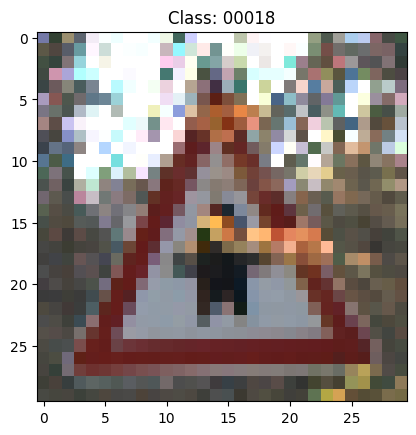

In [27]:
import matplotlib.pyplot as plt
import numpy as np


index_to_visualize = 7
image, label = train_dataset[index_to_visualize]
is_rgb = image.shape[0] == 3

height, width = image.shape[1], image.shape[2]
print(f"width: {width}, height: {height}")
print(f"Is rgb: {is_rgb}")

image_np = np.transpose(image.numpy(), (1, 2, 0))

plt.imshow(image_np)
plt.title(f'Class: {train_class_names[label]}')
plt.show()



In [7]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

dataset = CustomTrafficSignDataset(root_dir=root_dir, transform=transform)

def split_dataset(dataset, train_size):
    indices = list(range(len(dataset)))
    labels = [dataset[i][1] for i in indices]  

    train_indices, test_indices = train_test_split(indices, test_size=1.0-train_size, stratify=labels, shuffle=True, random_state=42)

    train_dataset = Subset(dataset, train_indices)
    test_dataset = Subset(dataset, test_indices)

    train_labels = [dataset[i][1] for i in train_indices]
    test_labels = [dataset[i][1] for i in test_indices]

    return train_dataset, test_dataset, train_labels, test_labels

train_dataset, test_dataset, train_labels, test_labels = split_dataset(dataset, 0.8)
print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")
print(f"Training labels: {len(train_labels)}")
print(f"Test labels: {len(test_labels)}")


Training set size: 21312
Test set size: 5328
Training labels: 21312
Test labels: 5328


In [5]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset



dataset = CustomTrafficSignDataset(root_dir=root_dir, transform=transform)

def split_dataset(dataset, train_size):
    indices = list(range(len(dataset)))
    labels = [dataset[i][1] for i in indices]  

    train_indices, test_indices = train_test_split(indices, test_size=1.0-train_size, stratify=labels, shuffle=True, random_state=42)

    train_dataset = Subset(dataset, train_indices)
    test_dataset = Subset(dataset, test_indices)

    return train_dataset, test_dataset

train_dataset, test_dataset = split_dataset(dataset, 0.8)
print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")


Training set size: 21312
Test set size: 5328


In [47]:

from sklearn.model_selection import train_test_split
from torch.utils.data import Subset


dataset = CustomTrafficSignDataset(root_dir=root_dir, transform=transform)
def split_dataset(dataset, train_size):
    indices = list(range(len(dataset)))
 
    train_size = train_size 
    test_size = 1.0 - train_size
    # split it
    train_indices, test_indices = train_test_split(indices, test_size = test_size, shuffle=True, random_state=42)
    train_dataset = Subset(dataset, train_indices)
    test_dataset = Subset(dataset, test_indices)

    return train_dataset, test_dataset

train_dataset, test_dataset = split_dataset(dataset, 0.8)
print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")



Training set size: 21312
Test set size: 5328
